In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('rotten_tomatoes_movies.csv')

In [3]:
critics = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')

In [4]:
movies.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
movies.shape

(17712, 22)

In [6]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [7]:
movies.tomatometer_status.info

<bound method Series.info of 0                 Rotten
1        Certified-Fresh
2                  Fresh
3        Certified-Fresh
4                  Fresh
              ...       
17707             Rotten
17708    Certified-Fresh
17709              Fresh
17710              Fresh
17711             Rotten
Name: tomatometer_status, Length: 17712, dtype: object>

In [8]:
critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [9]:
critics.review_type.info

<bound method Series.info of 0         Fresh
1         Fresh
2         Fresh
3         Fresh
4        Rotten
          ...  
49995    Rotten
49996    Rotten
49997    Rotten
49998    Rotten
49999    Rotten
Name: review_type, Length: 50000, dtype: object>

In [10]:
critics.review_type.value_counts()

review_type
Fresh     30796
Rotten    19204
Name: count, dtype: int64

In [11]:
critics.isnull().sum()

rotten_tomatoes_link        0
critic_name              1932
top_critic                  0
publisher_name              0
review_type                 0
review_score            13591
review_date                 0
review_content           8805
dtype: int64

In [12]:
critics.shape

(50000, 8)

In [13]:
df = pd.merge(critics, movies, how='inner', on='rotten_tomatoes_link')

In [14]:
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [15]:
df.shape

(50000, 29)

In [16]:
df.isnull().any()

rotten_tomatoes_link                False
critic_name                          True
top_critic                          False
publisher_name                      False
review_type                         False
review_score                         True
review_date                         False
review_content                       True
movie_title                         False
movie_info                           True
critics_consensus                    True
content_rating                      False
genres                              False
directors                            True
authors                              True
actors                               True
original_release_date                True
streaming_release_date               True
runtime                              True
production_company                   True
tomatometer_status                   True
tomatometer_rating                   True
tomatometer_count                    True
audience_status                   

In [17]:
df.isnull().sum()

rotten_tomatoes_link                    0
critic_name                          1932
top_critic                              0
publisher_name                          0
review_type                             0
review_score                        13591
review_date                             0
review_content                       8805
movie_title                             0
movie_info                            347
critics_consensus                    9796
content_rating                          0
genres                                  0
directors                             296
authors                              1382
actors                                179
original_release_date                 734
streaming_release_date                454
runtime                               355
production_company                    178
tomatometer_status                     43
tomatometer_rating                     43
tomatometer_count                      43
audience_status                   

We drop rows with NaN values.

In [19]:
df2 = df.dropna(subset=["tomatometer_status", "movie_info", "critics_consensus", "directors", "authors", "original_release_date", \
                        "streaming_release_date", "runtime", "critic_name", "review_score", "review_content", "actors", \
                        "production_company", "audience_status", "audience_rating", "audience_count"])

In [20]:
df2.shape

(21856, 29)

In [21]:
df2.isnull().sum()

rotten_tomatoes_link                0
critic_name                         0
top_critic                          0
publisher_name                      0
review_type                         0
review_score                        0
review_date                         0
review_content                      0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_

In [22]:
df_cleaned = df2.drop_duplicates()

In [23]:
df_cleaned.shape

(21855, 29)

In [24]:
df_cleaned.genres.value_counts()

genres
Drama, Mystery & Suspense                              1821
Comedy                                                 1422
Comedy, Drama                                          1401
Drama                                                  1321
Comedy, Romance                                         688
                                                       ... 
Art House & International, Comedy, Drama, Romance         6
Animation, Classics, Kids & Family, Television            5
Animation, Kids & Family, Musical & Performing Arts       4
Kids & Family, Science Fiction & Fantasy                  3
Classics, Drama, Television                               3
Name: count, Length: 198, dtype: int64

In [25]:
df_cleaned.genres.nunique()

198

We see that the genres are grouped together (e.g. "Action & Adventure, Drama, Mystery & Suspense") and we have 198 "unique" genre groups. However, we want to separate the genres into different columns and put 1 or 0 to signify the movie genre. Thus, a movie can have three genres and each column of the genre will have 1 on it.

In [27]:
# put the genres into a list
genre_list = list(df_cleaned.genres.unique())

In [28]:
genre_list

['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy',
 'Comedy',
 'Comedy, Romance',
 'Classics, Drama',
 'Action & Adventure, Drama, Kids & Family',
 'Action & Adventure, Classics, Drama',
 'Action & Adventure, Classics, Mystery & Suspense',
 'Drama',
 'Classics, Comedy, Romance',
 'Art House & International, Drama, Faith & Spirituality',
 'Drama, Mystery & Suspense',
 'Documentary, Special Interest',
 'Action & Adventure, Classics, Romance',
 'Drama, Science Fiction & Fantasy, Romance',
 'Action & Adventure, Drama, Mystery & Suspense',
 'Action & Adventure, Drama, Horror, Science Fiction & Fantasy',
 'Animation, Kids & Family, Science Fiction & Fantasy',
 'Horror, Mystery & Suspense',
 'Action & Adventure, Comedy, Drama, Mystery & Suspense',
 'Art House & International, Drama',
 'Comedy, Drama',
 'Drama, Kids & Family',
 'Action & Adventure, Classics, Drama, Western',
 'Drama, Romance',
 'Classics, Comedy, Drama, Romance',
 'Action & Adventure, Horror, Science Fiction & Fa

In [29]:
# we want to compile a list of individual genre
all_genres = []

for genre in genre_list:
    genres = genre.split(',')
    for g in genres:
        item = g.strip()
        if item not in all_genres:
            all_genres.append(item)

In [30]:
all_genres

['Action & Adventure',
 'Comedy',
 'Drama',
 'Science Fiction & Fantasy',
 'Romance',
 'Classics',
 'Kids & Family',
 'Mystery & Suspense',
 'Art House & International',
 'Faith & Spirituality',
 'Documentary',
 'Special Interest',
 'Horror',
 'Animation',
 'Western',
 'Sports & Fitness',
 'Musical & Performing Arts',
 'Television',
 'Cult Movies']

In [31]:
len(all_genres)

19

We have 19 genres now, instead of 198.

In [33]:
# create new genre columns
df_cleaned2 = df_cleaned.copy()
for g in all_genres:
    df_cleaned2.loc[:, g] = [0] * df_cleaned2.shape[0]

In [34]:
df_cleaned2.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,Faith & Spirituality,Documentary,Special Interest,Horror,Animation,Western,Sports & Fitness,Musical & Performing Arts,Television,Cult Movies
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,0,0,0,0,0,0,0,0,0,0
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,0,0,0,0,0,0,0,0,0,0
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,0,0,0,0,0,0,0,0,0,0
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,0,0,0,0,0,0,0,0,0,0
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,0,0,0,0,0,0,0,0,0,0


We want to check the genres in each movie. If we see a genre, we add 1 to the column with the genre name.

In [36]:
def contains_column_name(row, col_name):
    # Check if the column name is part of the genres listed
    genre_list = []
    genres = row.split(',')
    for g in genres:
        item = g.strip()
        genre_list.append(item)
    return 1 if col_name in genre_list else 0

In [37]:
for col in all_genres:
    df_cleaned2.loc[:, col] = df_cleaned2["genres"].apply(lambda row: contains_column_name(row, col))

In [38]:
df_cleaned2.iloc[:, -19:]

,Action & Adventure,Comedy,Drama,Science Fiction & Fantasy,Romance,Classics,Kids & Family,Mystery & Suspense,Art House & International,Faith & Spirituality,Documentary,Special Interest,Horror,Animation,Western,Sports & Fitness,Musical & Performing Arts,Television,Cult Movies
3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
49992,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
49993,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
49994,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now we have separate genre as columns and 1 or 0 to indicate that the movie is in those genres.

In [40]:
df_cleaned2.nunique()

rotten_tomatoes_link                  639
critic_name                          1715
top_critic                              2
publisher_name                        787
review_type                             2
review_score                          176
review_date                          4285
review_content                      21834
movie_title                           618
movie_info                            639
critics_consensus                     639
content_rating                          6
genres                                198
directors                             517
authors                               621
actors                                639
original_release_date                 568
streaming_release_date                291
runtime                               103
production_company                    203
tomatometer_status                      3
tomatometer_rating                    100
tomatometer_count                     150
audience_status                   

Text(0.5, 1.0, 'Rotten-Fresh-Certified-Fresh Distribution')

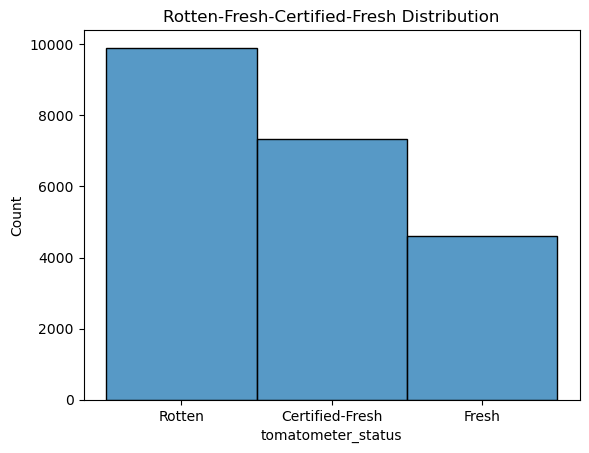

In [41]:
sns.histplot(data=df_cleaned2, x="tomatometer_status")
plt.title("Rotten-Fresh-Certified-Fresh Distribution")

In [42]:
df_cleaned2.tomatometer_status.value_counts()

tomatometer_status
Rotten             9904
Certified-Fresh    7345
Fresh              4606
Name: count, dtype: int64

In [43]:
print(f"The movies in the dataset are {9904/df_cleaned2.shape[0] * 100:.2f} percent Rotten, {4606/df_cleaned2.shape[0] * 100:.2f} percent Fresh, and {7345/df_cleaned2.shape[0] * 100:.2f} percent Certified-Fresh.")  

The movies in the dataset are 45.32 percent Rotten, 21.08 percent Fresh, and 33.61 percent Certified-Fresh.


Text(0.5, 1.0, 'How Fresh is Each Movie Rating?')

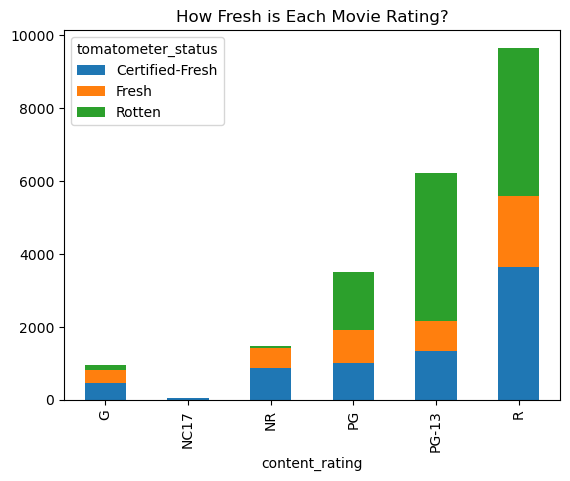

In [44]:
# How does each movie rating fare?
rt = pd.crosstab(df_cleaned2["content_rating"], df_cleaned2["tomatometer_status"])

rt.plot(kind="bar", stacked=True)
plt.title("How Fresh is Each Movie Rating?")

Text(0.5, 1.0, 'Movie Rating Distribution')

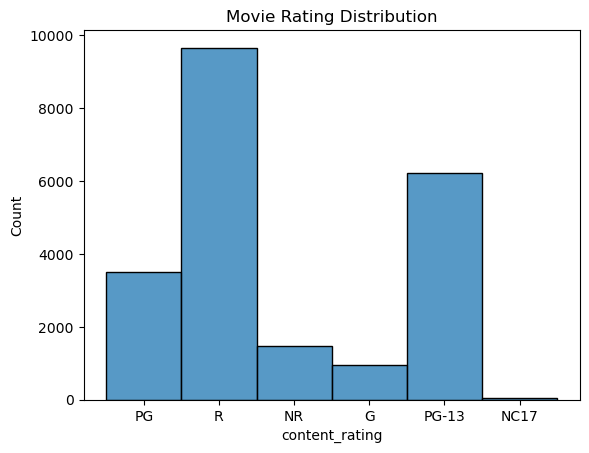

In [45]:
sns.histplot(data=df_cleaned2, x="content_rating")
plt.title("Movie Rating Distribution")

In [46]:
df_cleaned2["content_rating"].value_counts()

content_rating
R        9663
PG-13    6212
PG       3512
NR       1475
G         944
NC17       49
Name: count, dtype: int64

It looks like R-rated movies have the most "Rotten" score, followed by PG-13. However, since the R-rated and PG-13-rated movies make up more than half of the movies in this dataset, the "Rotten" score is unsurprising. What is interesting is that NR, despite only a fraction of R and PG-13, receives many "Fresh" and "Certified-Fresh" scores relative to the total number of movies with this rating. Also, we see that there is only a thin blue strip for NC17, which indicates that the existing NC17-rated movies also receives "Certified Fresh."

In [48]:
all_genres

['Action & Adventure',
 'Comedy',
 'Drama',
 'Science Fiction & Fantasy',
 'Romance',
 'Classics',
 'Kids & Family',
 'Mystery & Suspense',
 'Art House & International',
 'Faith & Spirituality',
 'Documentary',
 'Special Interest',
 'Horror',
 'Animation',
 'Western',
 'Sports & Fitness',
 'Musical & Performing Arts',
 'Television',
 'Cult Movies']

In [49]:
df_genres = df_cleaned2.iloc[:, -19:]

In [50]:
df_genres.head(5)

,Action & Adventure,Comedy,Drama,Science Fiction & Fantasy,Romance,Classics,Kids & Family,Mystery & Suspense,Art House & International,Faith & Spirituality,Documentary,Special Interest,Horror,Animation,Western,Sports & Fitness,Musical & Performing Arts,Television,Cult Movies
3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
genre_freq = df_genres.sum()

In [52]:
genre_freq

Action & Adventure            5668
Comedy                        6916
Drama                        13675
Science Fiction & Fantasy     4205
Romance                       3240
Classics                      2584
Kids & Family                 1713
Mystery & Suspense            7222
Art House & International     1444
Faith & Spirituality            53
Documentary                    403
Special Interest               406
Horror                        2858
Animation                      790
Western                        497
Sports & Fitness               270
Musical & Performing Arts      745
Television                      66
Cult Movies                    124
dtype: int64

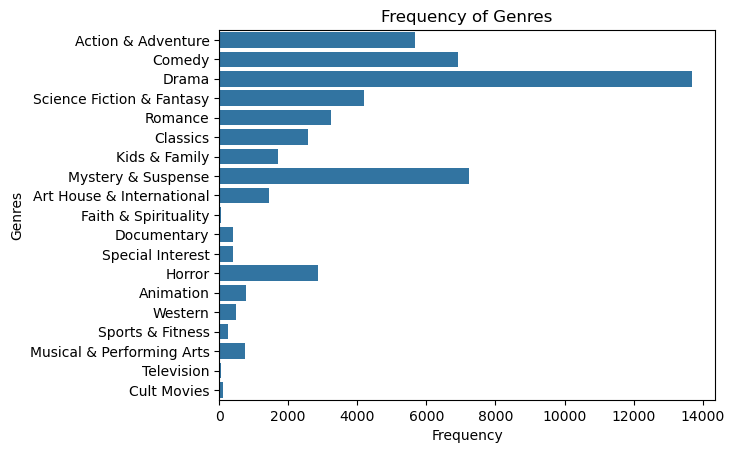

In [53]:
sns.barplot(x=genre_freq.values, y=genre_freq.index)
plt.ylabel('Genres')
plt.xlabel('Frequency')
plt.title('Frequency of Genres')
plt.show()

In [54]:
genre_freq.dtype

dtype('int64')

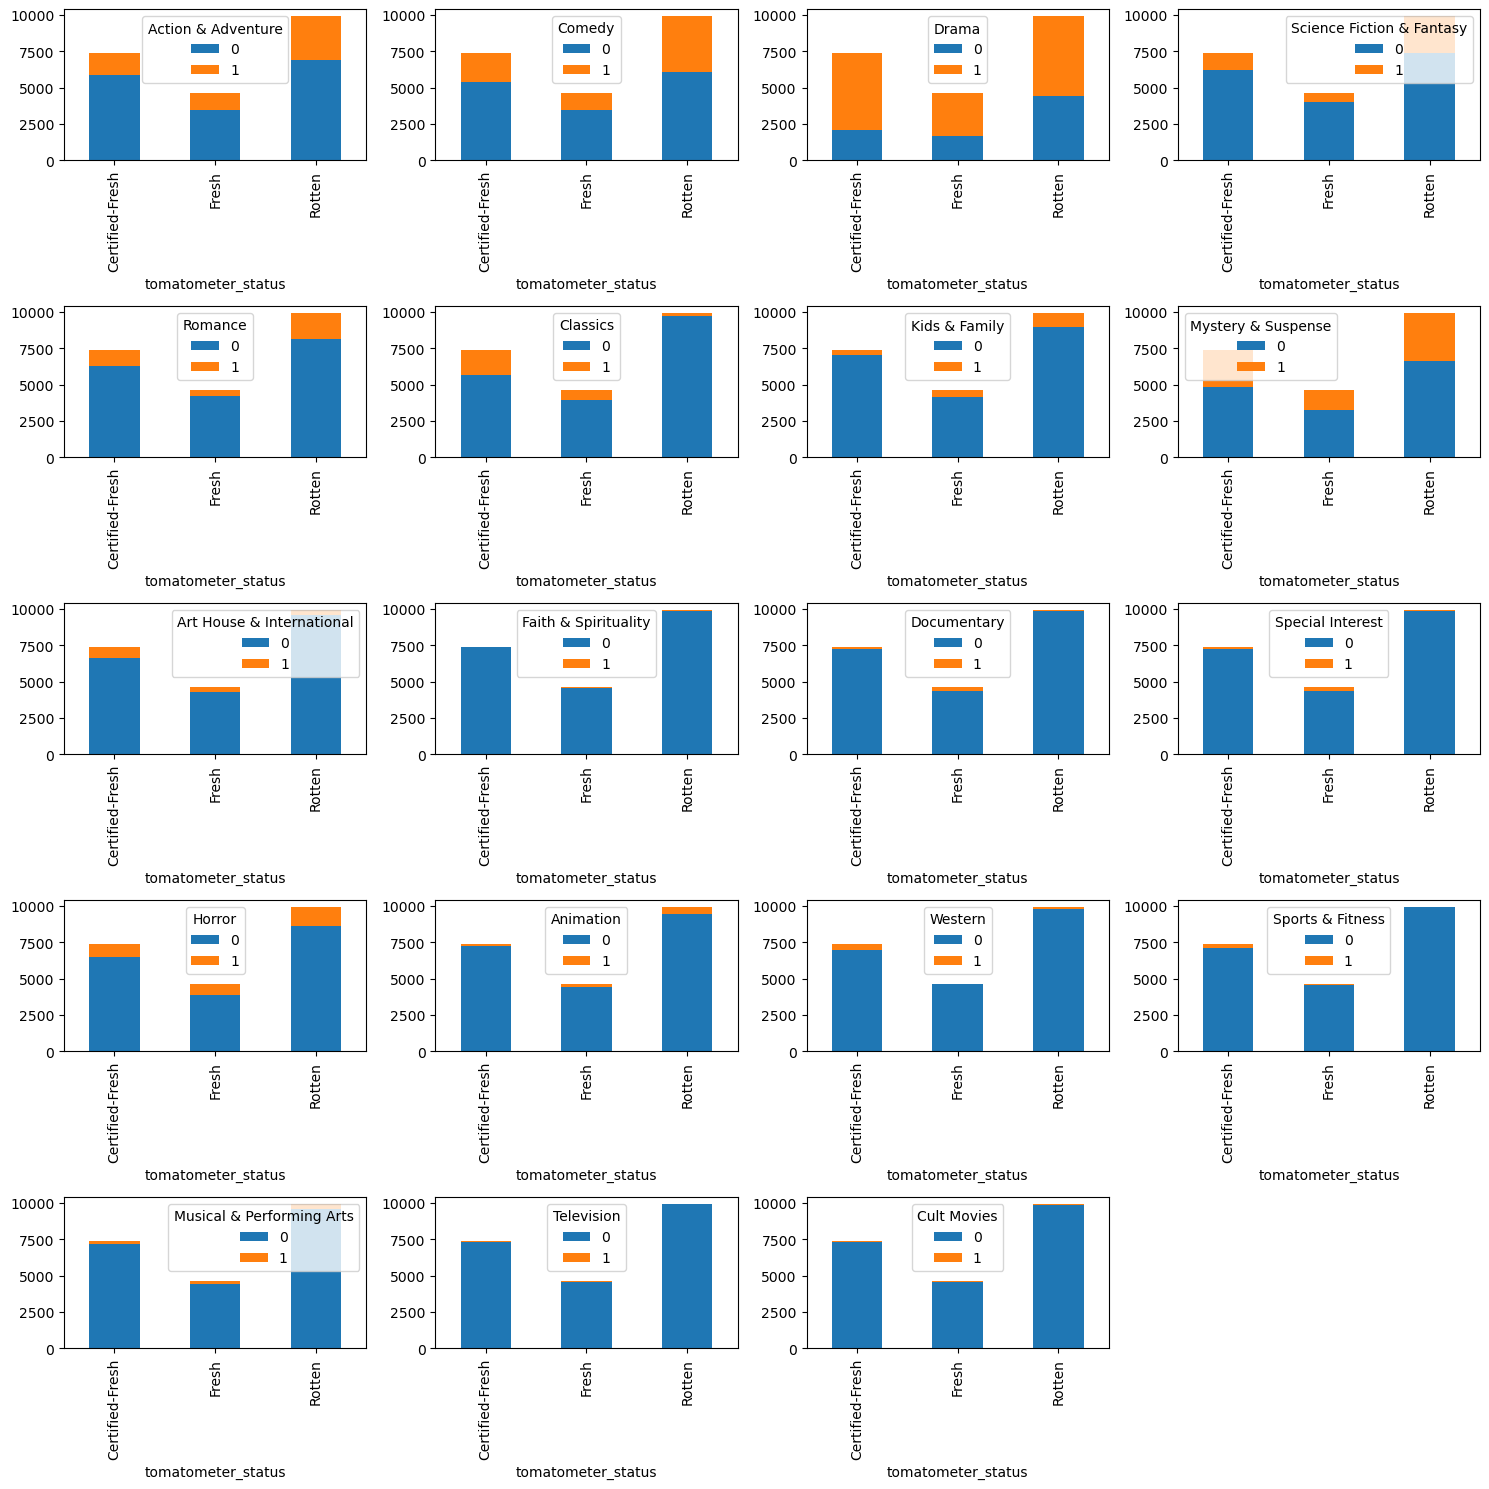

In [55]:
# Determine grid layout
rows = 5
cols = 4  # 5 * 4 = 20, which is more than 19. We'll ignore the last subplot.

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(19):
    ct = pd.crosstab(df_cleaned2["tomatometer_status"], df_cleaned2[all_genres[i]])
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    # Remove the last (20th) subplot if it's empty

fig.delaxes(axes[19])

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()

In [56]:
frequencies_fresh = {}
for col in all_genres:
    frequencies_fresh[col] = df_cleaned2.groupby('tomatometer_status')[col].sum()

In [57]:
frequencies_fresh

{'Action & Adventure': tomatometer_status
 Certified-Fresh    1491
 Fresh              1149
 Rotten             3028
 Name: Action & Adventure, dtype: int64,
 'Comedy': tomatometer_status
 Certified-Fresh    1946
 Fresh              1166
 Rotten             3804
 Name: Comedy, dtype: int64,
 'Drama': tomatometer_status
 Certified-Fresh    5253
 Fresh              2967
 Rotten             5455
 Name: Drama, dtype: int64,
 'Science Fiction & Fantasy': tomatometer_status
 Certified-Fresh    1113
 Fresh               567
 Rotten             2525
 Name: Science Fiction & Fantasy, dtype: int64,
 'Romance': tomatometer_status
 Certified-Fresh    1080
 Fresh               410
 Rotten             1750
 Name: Romance, dtype: int64,
 'Classics': tomatometer_status
 Certified-Fresh    1701
 Fresh               672
 Rotten              211
 Name: Classics, dtype: int64,
 'Kids & Family': tomatometer_status
 Certified-Fresh    306
 Fresh              431
 Rotten             976
 Name: Kids & Family,

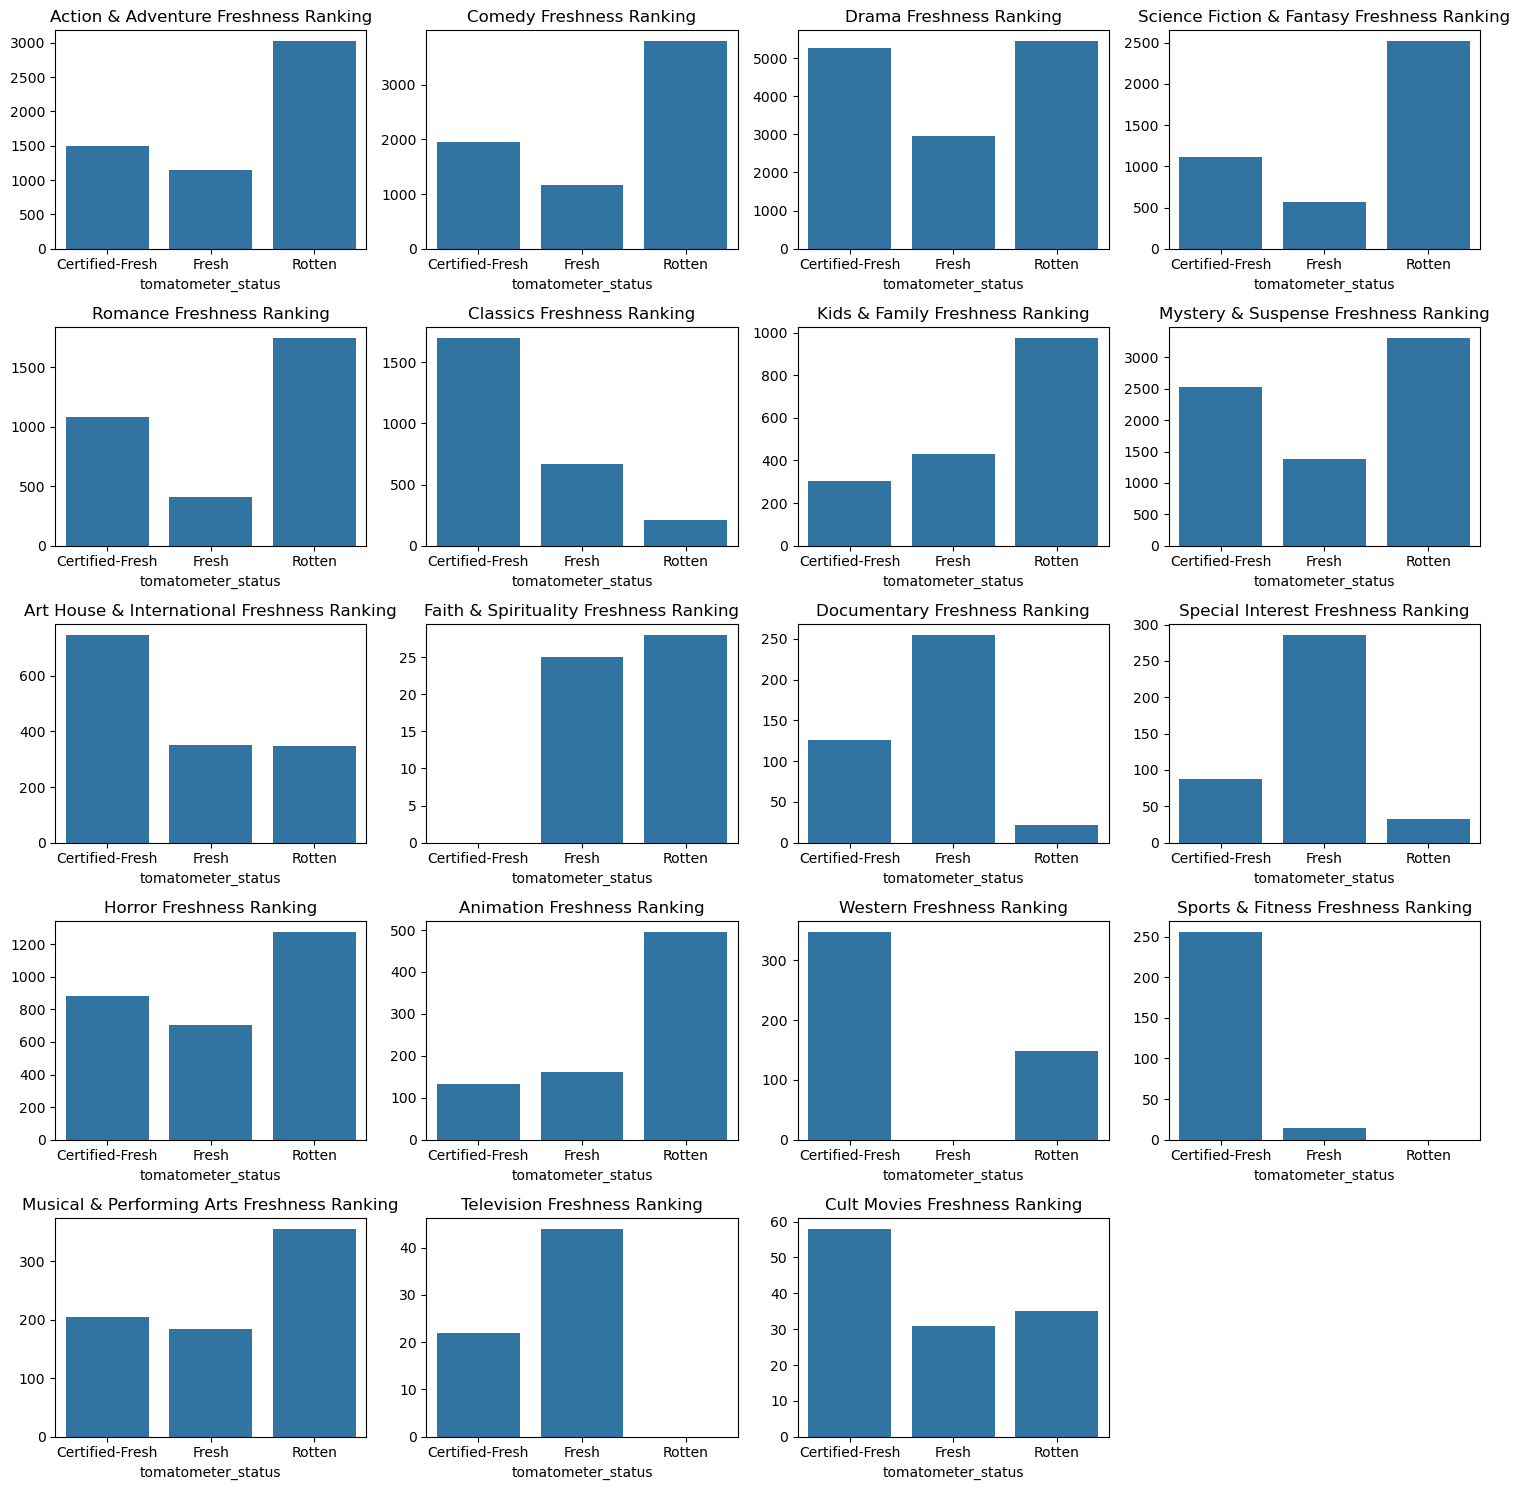

In [58]:
# Determine grid layout
rows = 5
cols = 4  # 5 * 4 = 20, which is more than 19. We'll ignore the last subplot.

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()
i = 0
for col, freq in frequencies_fresh.items():
    sns.barplot(x=freq.index, y=freq.values, ax=axes[i])
    axes[i].set_title(f'{col} Freshness Ranking')
    i += 1
    
    
# Remove the last (20th) subplot if it's empty   
fig.delaxes(axes[19])

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()    

## Prediction

For rating prediction ('rotten', 'fresh', 'certified fresh'), we will use sentiment analysis on two columsn: 'review_content' and 'critics_consensus'. We start by combining the columns and then cleaning them by removing stopwords, punctuations, digits, and special characters.

In [117]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

In [175]:
def remove_stopwords(text):
    stops = set(stopwords.words("english"))
    new_text = " ".join([word for word in text.split() if word not in stops])
    return new_text

def remove_punct(text):
    token = RegexpTokenizer(r'\w+')
    text = token.tokenize(text)
    text = " ".join(text)
    return text

def remove_digits(text):
    pattern = r'[^a-zA-Z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)

def remove_special_chars(text):
    char_pattern = r'[^a-zA-Z0-9.,!?:;\"\'\s]'
    return re.sub(char_pattern, '', text)

def lower(text):
    return text.lower()
    
def clean(text):
    new_text = remove_stopwords(text)
    new_text = remove_punct(new_text)
    new_text = remove_digits(new_text)
    new_text = remove_special_chars(new_text)
    new_text = lower(new_text)
    return new_text

In [133]:
df_review_clean = df_cleaned2[['review_content', 'critics_consensus']]

In [159]:
df_review_clean2 = df_review_clean.copy()
df_review_clean2['review + consensus'] = df_review_clean['review_content'] + ' ' + df_review_clean['critics_consensus']

In [177]:
df_review_clean3 = df_review_clean2.copy()
df_review_clean3['clean review + consensus'] = df_review_clean2['review + consensus'].apply(clean)

In [178]:
df_review_clean3.head(5)

,review_content,critics_consensus,review + consensus,clean review + consensus
3,Whether audiences will get behind The Lightnin...,Though it may seem like just another Harry Pot...,Whether audiences will get behind The Lightnin...,whether audiences get behind the lightning thi...
6,Harry Potter knockoffs don't come more transpa...,Though it may seem like just another Harry Pot...,Harry Potter knockoffs don't come more transpa...,harry potter knockoffs come transparent slapda...
7,"Percy Jackson isn't a great movie, but it's a ...",Though it may seem like just another Harry Pot...,"Percy Jackson isn't a great movie, but it's a ...",percy jackson great movie good one trotting ke...
8,"Fun, brisk and imaginative",Though it may seem like just another Harry Pot...,"Fun, brisk and imaginative Though it may seem ...",fun brisk imaginative though may seem like ano...
9,"Crammed with dragons, set-destroying fights an...",Though it may seem like just another Harry Pot...,"Crammed with dragons, set-destroying fights an...",crammed dragons set destroying fights things e...


Now that we have the data ready, we take the X and y sets.

In [187]:
y = df_cleaned2.tomatometer_status

In [189]:
y

3        Rotten
6        Rotten
7        Rotten
8        Rotten
9        Rotten
          ...  
49988    Rotten
49992    Rotten
49993    Rotten
49994    Rotten
49998    Rotten
Name: tomatometer_status, Length: 21855, dtype: object

In [191]:
X = df_review_clean3['clean review + consensus']

In [193]:
X.shape

(21855,)

In [197]:
y.shape

(21855,)

In [201]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Since the target variables are not numerical, we use LabelEncoder to convert them into numerical values.

In [203]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform
y = le.fit_transform(y)

In [205]:
# split into train and test sets
seed = 777
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)

In [219]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, max_features=1000, stop_words='english')
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [271]:
# create the model
xgb = XGBClassifier(
    objective="multi:softprob", 
    num_class=3,
    reg_alpha=0.5,  # L1 Regularization (Lasso)
    reg_lambda=1.0,  # L2 Regularization (Ridge)
    n_estimators=1000,
    max_depth=5
)
xgb.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [272]:
train_pred = xgb.predict(X_train_tfidf)
test_pred = xgb.predict(X_test_tfidf)

In [273]:
train_accuracy = accuracy_score(y_true=y_train, y_pred=train_pred)
test_accuracy = accuracy_score(y_true=y_test, y_pred=test_pred)

In [274]:
print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Train accuracy: 1.0000
Test accuracy: 0.9842
